In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [13]:
df = pd.read_csv('Final_dummies.csv', index_col = 0)

In [5]:
dfy = pd.read_csv('baselineDF_full_hour.csv')

In [7]:
dfy['is_arr_delayed'] = 0
dfy.loc[dfy['arr_delay'] >= 15] = 1

In [9]:
df_yvalue = dfy['is_arr_delayed']

In [14]:
df.columns

Index(['fl_date', 'origin_airport_id', 'dest_airport_id', 'taxi_out',
       'taxi_in', 'distance', 'dep_hour', 'arr_hour', 'perc_del',
       'med_dep_delay', 'med_arr_delay', 'med_distance', 'mean_carr',
       'mean_weather', 'mean_nas', 'mean_sec', 'mean_late_air',
       'monthly_passengers', 'monthly_mail', 'dep_fl_lv', 'dep_fl_ar',
       'arr_fl_lv', 'arr_fl_ar', 'dep_ps_tt', 'arr_ps_tt',
       'op_unique_carrier_9E', 'op_unique_carrier_AA', 'op_unique_carrier_AS',
       'op_unique_carrier_AX', 'op_unique_carrier_B6', 'op_unique_carrier_C5',
       'op_unique_carrier_CP', 'op_unique_carrier_DL', 'op_unique_carrier_EM',
       'op_unique_carrier_EV', 'op_unique_carrier_F9', 'op_unique_carrier_G4',
       'op_unique_carrier_G7', 'op_unique_carrier_HA', 'op_unique_carrier_KS',
       'op_unique_carrier_MQ', 'op_unique_carrier_NK', 'op_unique_carrier_OH',
       'op_unique_carrier_OO', 'op_unique_carrier_PT', 'op_unique_carrier_QX',
       'op_unique_carrier_UA', 'op_unique_carri

In [76]:
X = df.drop(['fl_date'], axis = 1)
#'taxi_in', 'taxi_out'
y = df_yvalue

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [83]:
clf = RandomForestClassifier(max_depth = 20, n_estimators = 100)

In [84]:
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20)

In [85]:
clf.predict_proba(X_test)

array([[0.853615  , 0.146385  ],
       [0.91173761, 0.08826239],
       [0.82412878, 0.17587122],
       ...,
       [0.98118246, 0.01881754],
       [0.95363536, 0.04636464],
       [0.96849648, 0.03150352]])

In [86]:
clf.score(X_test, Y_test)

0.8627075029012564

In [63]:
n_estimators = [10,50,100,500,1000]
criterion = ['gini', 'entropy']
max_depth = [1,5,10,20, None]
min_samples_split = [2,5,10]
min_samples_leaf = [1,5,10]
max_features = ['auto', 'sqrt', 'log2']


In [64]:
GSV = GridSearchCV(estimator = clf, param_grid = {'n_estimators':n_estimators, 'max_depth':max_depth})

In [65]:
GSV.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 20, None],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [75]:
GSV.cv_results_

{'mean_fit_time': array([ 0.15274172,  0.55152822,  1.27128181,  5.79928474, 11.57449427,
         0.37900662,  1.65388432,  3.10338092, 15.5658545 , 30.55101171,
         0.58998809,  2.73895884,  5.46213455, 27.49548082, 54.82143741,
         0.92004538,  4.50452719,  9.04052277, 45.26694808, 90.87674007,
         1.02333813,  4.95036526,  9.88264937, 49.08618684, 95.60573478]),
 'std_fit_time': array([0.03082161, 0.02543228, 0.11572555, 0.10363047, 0.293726  ,
        0.02737132, 0.09402189, 0.0811308 , 0.23772958, 0.14874151,
        0.02312665, 0.03109088, 0.08064627, 0.59094314, 0.98065719,
        0.01362787, 0.07447373, 0.05860993, 0.1494438 , 1.18120954,
        0.01252636, 0.04503816, 0.09219072, 0.15005459, 0.76428987]),
 'mean_score_time': array([0.01498437, 0.04388781, 0.08660984, 0.40358133, 0.82024956,
        0.020679  , 0.06553254, 0.12686849, 0.58928919, 1.16049652,
        0.02817068, 0.10678954, 0.20259013, 1.04471684, 2.05546851,
        0.05104728, 0.21068201, 0.4

In [ ]:
clf

In [54]:
X_train.iloc[:,2]

58845    12.0
46787    20.0
32714    24.0
98670    20.0
25596    10.0
         ... 
76887    26.0
43530    52.0
39848    20.0
87705    14.0
22786     7.0
Name: taxi_out, Length: 79273, dtype: float64

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 19 (0.108621)
2. feature 16 (0.101120)
3. feature 18 (0.100852)
4. feature 4 (0.100302)
5. feature 2 (0.097377)
6. feature 17 (0.093696)
7. feature 3 (0.079634)
8. feature 21 (0.064703)
9. feature 1 (0.062875)
10. feature 20 (0.061820)
11. feature 0 (0.061164)
12. feature 5 (0.009693)
13. feature 13 (0.008985)
14. feature 7 (0.006166)
15. feature 14 (0.006045)
16. feature 8 (0.005697)
17. feature 9 (0.004931)
18. feature 10 (0.004424)
19. feature 11 (0.004277)
20. feature 15 (0.003390)
21. feature 12 (0.003031)
22. feature 6 (0.002639)
23. feature 29 (0.000704)
24. feature 40 (0.000701)
25. feature 44 (0.000637)
26. feature 27 (0.000477)
27. feature 26 (0.000446)
28. feature 31 (0.000436)
29. feature 43 (0.000430)
30. feature 46 (0.000420)
31. feature 37 (0.000396)
32. feature 32 (0.000373)
33. feature 22 (0.000370)
34. feature 23 (0.000368)
35. feature 45 (0.000310)
36. feature 34 (0.000309)
3

<Figure size 432x288 with 0 Axes>

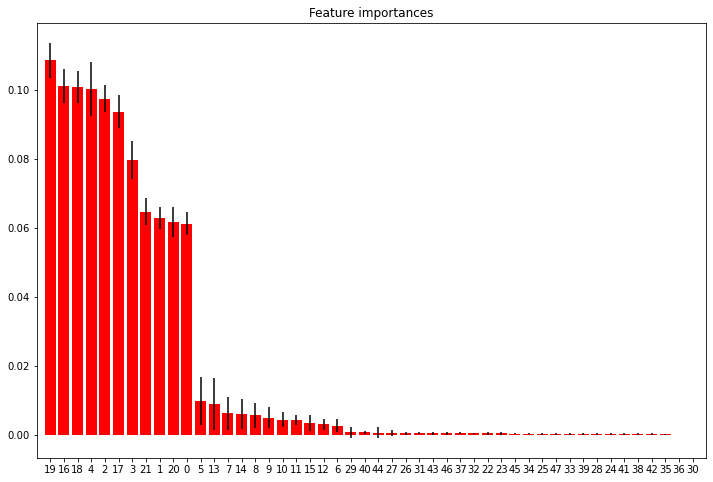

In [61]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()